In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def supergauss(x, A, x0, sigma, n):
    """
    Super-Gaussian function:
      A * exp(-| (x - x0) / sigma |^n )
    """
    return A * np.exp(-np.abs((x - x0) / sigma)**n)

def fit_supergaussian(x, y):
    """
    Fit a super-Gaussian to arbitrary x, y data.
    Returns a dict with keys: A, center, sigma, n, half_max, FWHM.
    """
    # Normalize y to [0, 1]
    y_norm = (y - np.min(y)) / (np.max(y) - np.min(y))
    # Initial guesses
    A0 = 1.0
    x0_0 = x[np.argmax(y_norm)]
    sigma0 = (np.max(x) - np.min(x)) / 10
    n0 = 4.0
    p0 = [A0, x0_0, sigma0, n0]
    bounds = ([0, np.min(x), 0, 2], [np.inf, np.max(x), np.inf, 20])
    # Perform fit
    popt, _ = curve_fit(supergauss, x, y_norm, p0=p0, bounds=bounds, maxfev=5000)
    A_fit, x0_fit, sigma_fit, n_fit = popt
    # Compute half-max and FWHM
    half_max = A_fit / 2
    FWHM = 2 * sigma_fit * (np.log(2))**(1 / n_fit)
    return {
        'A': A_fit,
        'center': x0_fit,
        'sigma': sigma_fit,
        'n': n_fit,
        'half_max': half_max,
        'FWHM': FWHM
    }

def plot_data_and_fit(title, x, y):
    """
    Plot raw data x,y and super-Gaussian fit.
    Annotates center, FWHM boundaries, and half-max.
    Prints center, half-max, and FWHM.
    """
    results = fit_supergaussian(x, y)
    A_fit = results['A']
    x0 = results['center']
    sigma = results['sigma']
    n = results['n']
    half_max = results['half_max']
    FWHM = results['FWHM']
    # Normalize y for plotting
    y_norm = (y - np.min(y)) / (np.max(y) - np.min(y))
    y_fit = supergauss(x, A_fit, x0, sigma, n)
    left_edge = x0 - FWHM / 2
    right_edge = x0 + FWHM / 2

    plt.figure(figsize=(8, 5))
    plt.plot(x, y_norm, label='Normalized data')
    plt.plot(x, y_fit, linestyle='--', label=f'Super-Gaussian fit, n={n:.2f}')
    plt.axvline(x0, color='gray', linestyle=':', linewidth=1.5, label=f'Center = {x0:.1f} nm')
    plt.axvline(left_edge, color='red', linestyle='-.', linewidth=1.5)
    plt.axvline(right_edge, color='red', linestyle='-.', linewidth=1.5, label=f'FWHM = {FWHM:.1f} nm')
    plt.axhline(half_max, color='blue', linestyle=':', linewidth=1.5, label=f'Half max = {half_max:.2f}')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Normalized Intensity')
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    # plt.yscale('log')
    plt.show()

    # Print results
    print(f"Center = {x0:.1f} nm")
    print(f"Half max = {half_max:.2f}")
    print(f"FWHM = {FWHM:.1f} nm")



In [33]:
from pathlib import Path

def return_mean_data(filenames):
    """
    This function takes an array of filenames, reads the data from each file,
    and returns the mean x and y data.
    
    Parameters:
    filenames (list): List of file paths to read data from.
    
    Returns:
    tuple: Mean x and y data as numpy arrays.
    """
    no_of_files = len(filenames)
    
    # Calculate mean of the x and y data from all files
    mean_x = np.zeros_like(np.loadtxt(filenames[0])[:, 0])
    mean_y = np.zeros_like(np.loadtxt(filenames[0])[:, 1])

    for filename in filenames:
        data = np.loadtxt(filename)
        x = data[:, 0]
        y = data[:, 1]
        
        mean_x += x
        mean_y += y
            
    # Average the accumulated values
    mean_x /= no_of_files 
    mean_y /= no_of_files 
    
    return mean_x, mean_y


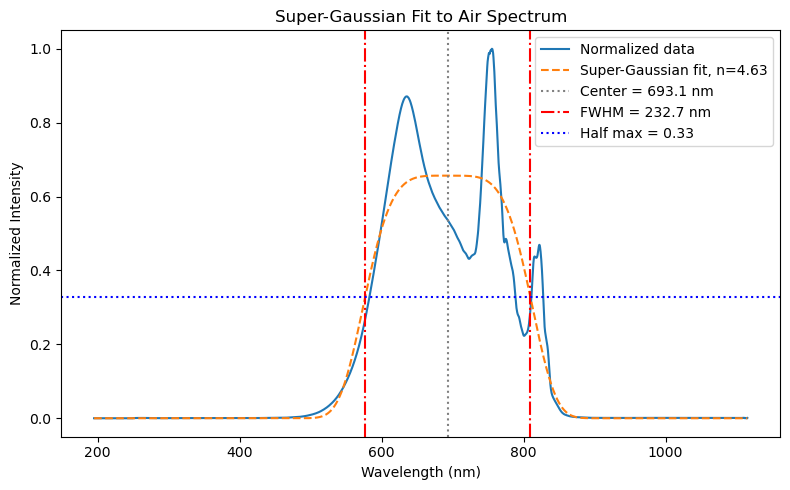

Center = 693.1 nm
Half max = 0.33
FWHM = 232.7 nm


In [34]:
maxbroadening_air = [Path(rf"C:\Users\soumy\OneDrive\Desktop\ARL\SCG\SCG-data-cleaned\air vs BK7\maxpower, AIR, 2350mw{i}.txt") for i in range(14, 35)
                     ]

x, y = return_mean_data(maxbroadening_air)
plot_data_and_fit("Super-Gaussian Fit to Air Spectrum", x, y)

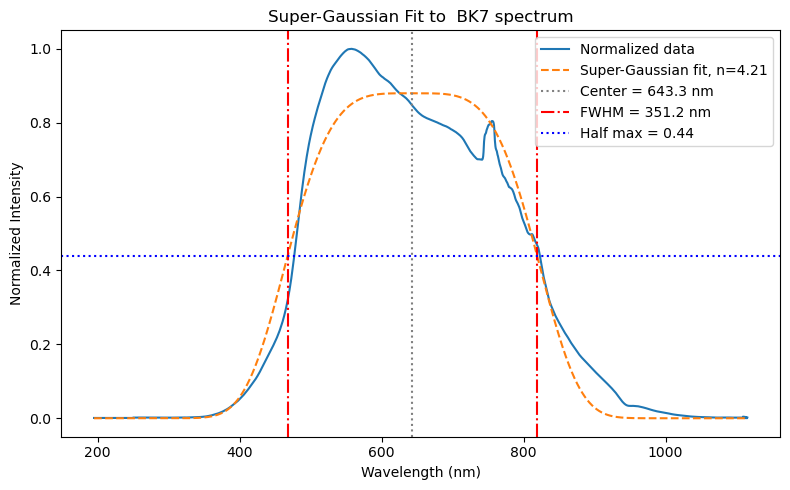

Center = 643.3 nm
Half max = 0.44
FWHM = 351.2 nm


In [35]:
maxbroadening_bk7 = [Path(rf"C:\Users\soumy\OneDrive\Desktop\ARL\SCG\SCG-data-cleaned\air vs BK7\maxpower, BK7, 2350mw{i}.txt") for i in range(11, 35)]

x, y = return_mean_data(maxbroadening_bk7)
plot_data_and_fit("Super-Gaussian Fit to  BK7 spectrum", x, y)



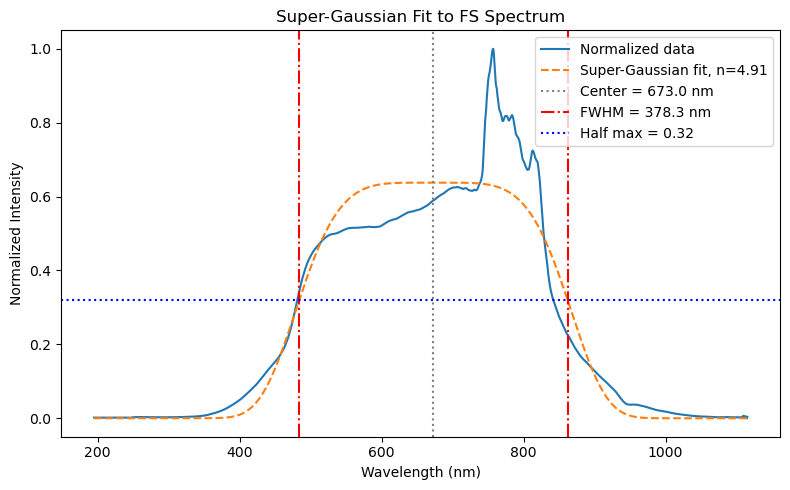

Center = 673.0 nm
Half max = 0.32
FWHM = 378.3 nm


In [36]:
maxbroadening_fs = [Path(rf"C:\Users\soumy\OneDrive\Desktop\ARL\SCG\SCG-data-cleaned\air vs FS\maxpower, FS , 2350mw{i}.txt") for i in range(1, 20)]

x, y = return_mean_data(maxbroadening_fs)
plot_data_and_fit("Super-Gaussian Fit to FS Spectrum", x, y)